In [3]:
#REVERSIBLE CHEMICAL REACTION 
#ODE 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint


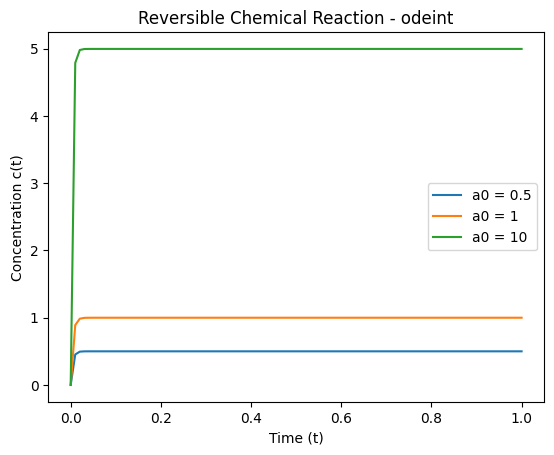

In [4]:

#Params 

k_plus = 50
k_minus = 0.1
b0= 5

#Define ODE function 

def reversible_reaction (c0, t, a0):
    dydt = k_plus * (a0 - c0) * (b0 - c0) - k_minus*c0
    return dydt

t = np.linspace(0, 1, 100)
c0 = 0
a0= [0.5, 1, 10]

#Solving
for i in a0:
    solution= odeint (reversible_reaction, c0, t, args=(i,))

    plt.plot(t, solution, label=f'a0 = {i}')
    plt.xlabel('Time (t)')
    plt.ylabel('Concentration c(t)')
    plt.title('Reversible Chemical Reaction - odeint')
    plt.legend()

full_output = 1

#Plot 

plt.show()


In [ ]:

#Params 

k_plus = 50
k_minus = 0.1
b0= 5

#Define ODE function 

def reversible_reaction (c0, t, a0):
    dydt = k_plus * (a0 - c0) * (b0 - c0) - k_minus*c0
    return dydt

t = np.linspace(0, 1, 100)
c0 = 0
a0= [0.5, 1, 10]

#Solving
for i in a0:
    solution= odeint (reversible_reaction, c0, t, args=(i,))

    plt.plot(t, solution, label=f'a0 = {i}')
    plt.xlabel('Time (t)')
    plt.ylabel('Concentration c(t)')
    plt.title('Reversible Chemical Reaction - odeint')
    plt.legend()

full_output = 1

#Plot 

plt.show()


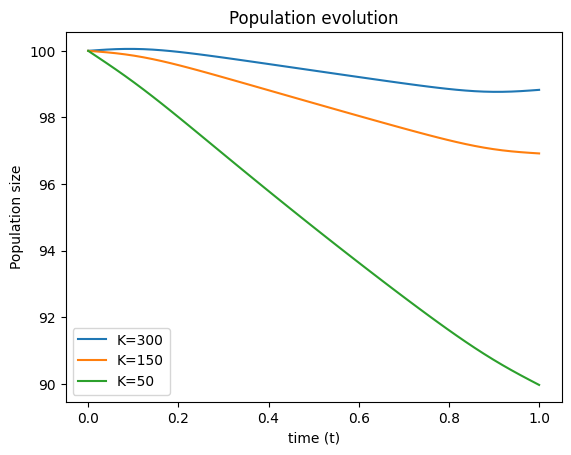

In [64]:
#GROWTH MODEL : COMPETITION intrapopulation + OUT TAKE 

#r : growth rate > 0 


r= 0.06

def competition_outake (y0,t,K):
    b = - 0.03*(2 - np.exp(-5*(np.sin(t*np.pi))**2))
    dydt = r*y0 - r/ K * y0**2 + b*y0
    return dydt

y0 = 100 
t = np.linspace (0, 1, 50)
K = [300, 150, 50]

for i in K:
    solution = odeint( competition_outake, y0, t, args=(i,))
    plt.plot (t, solution, label= f'K={i}')
    plt.xlabel("time (t)")
    plt.ylabel("Population size")
    plt.title("Population evolution")
    plt.legend()
plt.show()

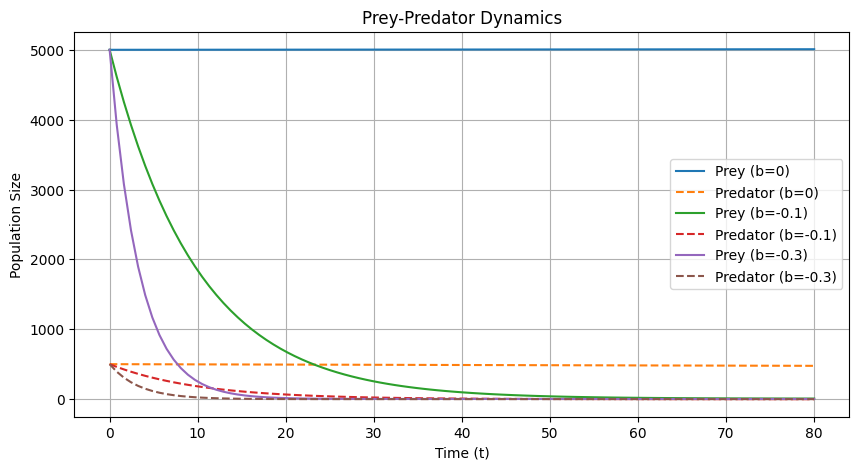

In [20]:
#PREY PREDATOR + OUT TAKE 
#population dynamic as function of t and b(t)

r_p = 0.6
r_s =-0.2
sigma_p = 2* 10**(-6)
sigma_s = 10**(-4)
alpha = 10**(-3)
mu = 10**(-2)
bt = [0, -0.1, -0.3]

def prey_predator_outake(y, t , bt):   #collect the variables in y 
    p0, s0 = y
    dpdt = r_p - sigma_p*p0 - alpha*s0 + bt*p0
    dsdt = r_s - sigma_s*s0 - alpha*p0*mu + bt*s0
    return [dpdt, dsdt]

t = np.linspace(0, 80, 100)
p0 = 5000
s0= 500

plt.figure(figsize=(10, 5))

for i in bt:
    y0 = [p0, s0]
    solution = odeint( prey_predator_outake, y0, t, args = (i,))

    prey = solution[:, 0]
    predator = solution[:, 1]

    plt.plot(t, prey, label=f'Prey (b={i})')
    plt.plot(t, predator, label=f'Predator (b={i})', linestyle='--')

plt.xlabel('Time (t)')
plt.ylabel('Population Size')
plt.title('Prey-Predator Dynamics')
plt.legend()
plt.grid()
plt.show()
